In [1]:
# imports
import datetime as dt
import pandas as pd

In [2]:
# load in data
df_1 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2000_2009.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_1.shape)
df_1.head()

(266973, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [3]:
# load in data
df_2 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2010_2019.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_2.shape)
df_2.head()

(992768, 5)


,DateTime,Open,High,Low,Close
0,2010-01-04 09:30:00,1116.56,1122.15,1116.56,1122.15
1,2010-01-04 09:31:00,1122.65,1123.80,1122.65,1123.80
2,2010-01-04 09:32:00,1123.96,1124.23,1123.95,1124.23
3,2010-01-04 09:33:00,1124.27,1124.27,1124.05,1124.23
4,2010-01-04 09:34:00,1124.17,1124.29,1124.17,1124.26


In [4]:
# load in data
df_3 = pd.read_csv('/Users/josephbell/Downloads/SPX_hr5aqh2 2/SPX_2020_2020.txt', sep=",", header=None,
                names=["DateTime", "Open", "High", "Low", "Close"])
print(df_3.shape)
df_3.head()

(90339, 5)


,DateTime,Open,High,Low,Close
0,2020-01-02 09:30:00,3244.67,3247.40,3244.67,3247.22
1,2020-01-02 09:31:00,3247.19,3247.22,3245.01,3245.22
2,2020-01-02 09:32:00,3245.07,3245.54,3244.16,3244.66
3,2020-01-02 09:33:00,3244.89,3247.69,3244.89,3247.61
4,2020-01-02 09:34:00,3247.38,3248.08,3246.92,3246.92


In [5]:
# concatenate dataframes
frames = [df_1, df_2, df_3]
df = pd.concat(frames)
print(df.shape)
df.head()

(1350080, 5)


,DateTime,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30 09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30 09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30 09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30 09:34:00,1495.36,1495.36,1494.98,1495.09


In [6]:
# TODO - concatenate multiple txt files to include all data in the dataset - X
# separate out date and time or leave? - X
# look at price perecentage gain of each day from 3:30 pm to 3:40, 3:50, 4:00 pm 
# see if there is any pattern
# could compare it to other 30 minute intervals

In [7]:
# split date and time into two separate columns
df[['Date','Time']] = df.DateTime.str.split(" ",expand=True)
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Time,Open,High,Low,Close
0,2007-04-30,09:30:00,1494.07,1494.89,1494.07,1494.89
1,2007-04-30,09:31:00,1494.60,1494.60,1494.48,1494.48
2,2007-04-30,09:32:00,1494.49,1494.82,1494.49,1494.77
3,2007-04-30,09:33:00,1494.84,1495.32,1494.84,1495.29
4,2007-04-30,09:34:00,1495.36,1495.36,1494.98,1495.09


In [8]:
# convert datetime to pandas
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# look at 2015 onward or maybe August 2015 onward
df = df[df['Date'] > '2012-01-01']
df.head()

,Date,Time,Open,High,Low,Close
199343,2012-01-03,09:30:00,1258.86,1271.17,1258.86,1271.17
199344,2012-01-03,09:31:00,1271.59,1274.49,1271.59,1274.49
199345,2012-01-03,09:32:00,1274.58,1277.05,1274.58,1277.05
199346,2012-01-03,09:33:00,1277.13,1278.82,1277.13,1278.82
199347,2012-01-03,09:34:00,1278.96,1279.77,1278.96,1279.60


# 3:30 - 4:00

In [10]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(4438, 6)


,Date,Time,Open,High,Low,Close
89536,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90
90328,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90


In [11]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.tail()

(4334, 6)


,Date,Time,Open,High,Low,Close
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90


In [12]:
# data does not include weekends and holidays...only trading days
# so we don't have to fix that like in other datasets!

In [13]:
# TODO - calculate the return from 3:30 pm to 4:00 pm each day
ramp['Time'].value_counts()
# looks like an odd number of times? should be even!

16:00:00    2167
15:30:00    2167
Name: Time, dtype: int64

In [14]:
# ramp = ramp.set_index('Date')
# ramp

In [15]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN
199733,2012-01-03,16:00:00,1276.78,1276.86,1276.73,1276.86,1278.67,-0.001478
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1276.78,0.000102
200130,2012-01-04,16:00:00,1277.30,1277.35,1277.29,1277.31,1276.91,0.000305
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1277.30,0.002137
...,...,...,...,...,...,...,...,...
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3398.36,-0.017058
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3338.75,0.002510


In [16]:
# change format to % for readability
ramp['% Change'] = ramp['Percentage Change'].map(lambda x: "{0:.2f}%".format(x*100))
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN,nan%
199733,2012-01-03,16:00:00,1276.78,1276.86,1276.73,1276.86,1278.67,-0.001478,-0.15%
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1276.78,0.000102,0.01%
200130,2012-01-04,16:00:00,1277.30,1277.35,1277.29,1277.31,1276.91,0.000305,0.03%
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1277.30,0.002137,0.21%
...,...,...,...,...,...,...,...,...,...
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016,-0.70%
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3398.36,-0.017058,-1.71%
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491,-0.05%
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3338.75,0.002510,0.25%


In [17]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
# look at end of day rows only to get percentage change for the last half hour
ramp = ramp[(ramp['Time'] == '16:00:00')] #& (ramp['Date'] > '2016-01-01')]
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change,Price Direction
199733,2012-01-03,16:00:00,1276.78,1276.86,1276.73,1276.86,1278.67,-0.001478,-0.15%,0
200130,2012-01-04,16:00:00,1277.30,1277.35,1277.29,1277.31,1276.91,0.000305,0.03%,1
200526,2012-01-05,16:00:00,1281.02,1281.06,1281.02,1281.05,1280.03,0.000773,0.08%,1
200922,2012-01-06,16:00:00,1277.90,1277.90,1277.82,1277.84,1278.64,-0.000579,-0.06%,0
201318,2012-01-09,16:00:00,1280.42,1280.63,1280.42,1280.63,1280.39,0.000023,0.00%,1
...,...,...,...,...,...,...,...,...,...,...
87159,2020-09-04,16:00:00,3426.38,3426.86,3426.38,3426.86,3451.01,-0.007137,-0.71%,0
87951,2020-09-08,16:00:00,3332.09,3332.09,3331.85,3331.85,3350.20,-0.005406,-0.54%,0
88743,2020-09-09,16:00:00,3398.36,3399.06,3398.36,3399.06,3422.37,-0.007016,-0.70%,0
89535,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3340.39,-0.000491,-0.05%,0


In [19]:
ax = ramp['Percentage Change'].plot.kde()

In [20]:
ramp['Percentage Change'].describe()

count    2167.000000
mean       -0.000013
std         0.003011
min        -0.028442
25%        -0.000936
50%         0.000042
75%         0.000943
max         0.048432
Name: Percentage Change, dtype: float64

In [21]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.514536
0    0.485464
Name: Price Direction, dtype: float64

In [22]:
# TODO - look at 3:30 - 3:40, 3:30 - 3:50 etc
# add features like market performance and market up or down day

# 3:30 to 3:40

In [23]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '15:40:00')]
print(ramp.shape)
ramp.tail()

(4438, 6)


,Date,Time,Open,High,Low,Close
89496,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90287,2020-09-11,15:40:00,3342.47,3345.44,3342.34,3343.71
90288,2020-09-11,15:40:00,3342.47,3345.44,3342.34,3343.71


In [24]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.head()

(4334, 6)


,Date,Time,Open,High,Low,Close
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50
199713,2012-01-03,15:40:00,1278.53,1278.81,1278.53,1278.78
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27
200110,2012-01-04,15:40:00,1278.22,1278.30,1278.22,1278.24
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99


In [25]:
ramp['Time'].value_counts()

15:40:00    2167
15:30:00    2167
Name: Time, dtype: int64

In [26]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN
199713,2012-01-03,15:40:00,1278.53,1278.81,1278.53,1278.78,1278.67,-0.000109
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1278.53,-0.001267
200110,2012-01-04,15:40:00,1278.22,1278.30,1278.22,1278.24,1276.91,0.001026
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1278.22,0.001416
...,...,...,...,...,...,...,...,...
88703,2020-09-09,15:40:00,3411.73,3414.10,3411.67,3413.39,3422.37,-0.003109
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3411.73,-0.020910
89495,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19,3340.39,0.001215
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3344.45,0.000801


In [27]:
# change format to % for readability
ramp['% Change'] = ramp['Percentage Change'].map(lambda x: "{0:.2f}%".format(x*100))
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change,% Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN,nan%
199713,2012-01-03,15:40:00,1278.53,1278.81,1278.53,1278.78,1278.67,-0.000109,-0.01%
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1278.53,-0.001267,-0.13%
200110,2012-01-04,15:40:00,1278.22,1278.30,1278.22,1278.24,1276.91,0.001026,0.10%
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1278.22,0.001416,0.14%
...,...,...,...,...,...,...,...,...,...
88703,2020-09-09,15:40:00,3411.73,3414.10,3411.67,3413.39,3422.37,-0.003109,-0.31%
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3411.73,-0.020910,-2.09%
89495,2020-09-10,15:40:00,3344.45,3347.22,3342.99,3347.19,3340.39,0.001215,0.12%
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3344.45,0.000801,0.08%


In [28]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

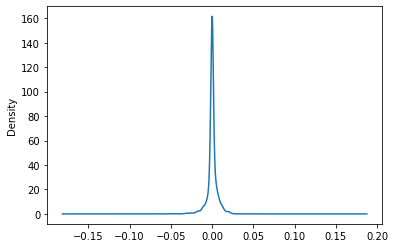

In [29]:
ax = ramp['Percentage Change'].plot.kde()

In [30]:
ramp['Percentage Change'].describe()

count    4333.000000
mean        0.000246
std         0.006872
min        -0.089139
25%        -0.000944
50%         0.000141
75%         0.001488
max         0.095229
Name: Percentage Change, dtype: float64

In [31]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.549377
0    0.450623
Name: Price Direction, dtype: float64

# 3:30 to 3:50

In [32]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df[(df['Time'] == '15:30:00') | (df['Time'] == '15:50:00')]
print(ramp.shape)
ramp.tail()

(4438, 6)


,Date,Time,Open,High,Low,Close
89516,2020-09-10,15:50:00,3339.36,3343.88,3336.51,3343.68
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90307,2020-09-11,15:50:00,3343.65,3345.35,3340.03,3344.19
90308,2020-09-11,15:50:00,3343.65,3345.35,3340.03,3344.19


In [33]:
# looks like there are some duplicates with same date and timestamp towards the end
ramp = ramp.drop_duplicates()
print(ramp.shape)
ramp.head()

(4334, 6)


,Date,Time,Open,High,Low,Close
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50
199723,2012-01-03,15:50:00,1280.57,1280.57,1280.17,1280.17
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27
200120,2012-01-04,15:50:00,1277.15,1277.15,1276.69,1276.69
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99


In [34]:
ramp['Time'].value_counts()

15:50:00    2167
15:30:00    2167
Name: Time, dtype: int64

In [35]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN
199723,2012-01-03,15:50:00,1280.57,1280.57,1280.17,1280.17,1278.67,0.001486
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1280.57,-0.002858
200120,2012-01-04,15:50:00,1277.15,1277.15,1276.69,1276.69,1276.91,0.000188
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1277.15,0.002255
...,...,...,...,...,...,...,...,...
88723,2020-09-09,15:50:00,3408.21,3408.21,3403.26,3405.28,3422.37,-0.004137
89475,2020-09-10,15:30:00,3340.39,3340.39,3336.96,3338.90,3408.21,-0.019899
89515,2020-09-10,15:50:00,3339.36,3343.88,3336.51,3343.68,3340.39,-0.000308
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3339.36,0.002327


In [36]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

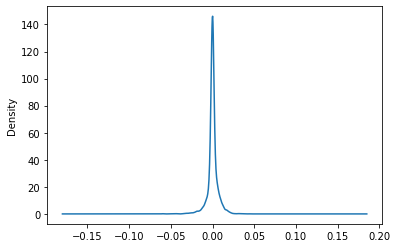

In [37]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [38]:
ramp['Percentage Change'].describe()

count    4333.000000
mean        0.000246
std         0.006930
min        -0.088719
25%        -0.001216
50%         0.000134
75%         0.001839
max         0.093731
Name: Percentage Change, dtype: float64

In [39]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.533918
0    0.466082
Name: Price Direction, dtype: float64

In [40]:
# look at every year to see if the ramp was more prevalent in certain years

# 2012

In [41]:
df_2012 = df[df['Date'].dt.year == 2012]
df_2012.head()

,Date,Time,Open,High,Low,Close
199343,2012-01-03,09:30:00,1258.86,1271.17,1258.86,1271.17
199344,2012-01-03,09:31:00,1271.59,1274.49,1271.59,1274.49
199345,2012-01-03,09:32:00,1274.58,1277.05,1274.58,1277.05
199346,2012-01-03,09:33:00,1277.13,1278.82,1277.13,1278.82
199347,2012-01-03,09:34:00,1278.96,1279.77,1278.96,1279.60


In [42]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df_2012[(df_2012['Time'] == '15:30:00') | (df_2012['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(494, 6)


,Date,Time,Open,High,Low,Close
297138,2012-12-27,16:00:00,1417.93,1418.04,1417.93,1418.04
297505,2012-12-28,15:30:00,1409.44,1409.82,1409.44,1409.74
297535,2012-12-28,16:00:00,1402.44,1402.48,1402.42,1402.42
297901,2012-12-31,15:30:00,1417.82,1418.81,1417.82,1418.81
297931,2012-12-31,16:00:00,1426.52,1426.52,1426.34,1426.34


In [43]:
ramp['Time'].value_counts()

16:00:00    247
15:30:00    247
Name: Time, dtype: int64

In [44]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
199703,2012-01-03,15:30:00,1278.67,1278.69,1278.41,1278.50,NaN,NaN
199733,2012-01-03,16:00:00,1276.78,1276.86,1276.73,1276.86,1278.67,-0.001478
200100,2012-01-04,15:30:00,1276.91,1277.27,1276.91,1277.27,1276.78,0.000102
200130,2012-01-04,16:00:00,1277.30,1277.35,1277.29,1277.31,1276.91,0.000305
200496,2012-01-05,15:30:00,1280.03,1280.11,1279.99,1279.99,1277.30,0.002137
...,...,...,...,...,...,...,...,...
297138,2012-12-27,16:00:00,1417.93,1418.04,1417.93,1418.04,1415.80,0.001504
297505,2012-12-28,15:30:00,1409.44,1409.82,1409.44,1409.74,1417.93,-0.005988
297535,2012-12-28,16:00:00,1402.44,1402.48,1402.42,1402.42,1409.44,-0.004967
297901,2012-12-31,15:30:00,1417.82,1418.81,1417.82,1418.81,1402.44,0.010967


In [45]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


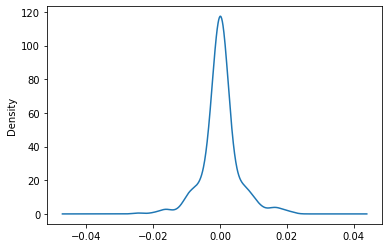

In [46]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [47]:
ramp['Percentage Change'].describe()

count    493.000000
mean       0.000237
std        0.005444
min       -0.024311
25%       -0.001822
50%        0.000189
75%        0.002079
max        0.021139
Name: Percentage Change, dtype: float64

In [48]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.526316
0    0.473684
Name: Price Direction, dtype: float64

# 2013

In [49]:
df_2013 = df[df['Date'].dt.year == 2013]
df_2013.head()

,Date,Time,Open,High,Low,Close
297938,2013-01-02,09:30:00,1426.19,1443.44,1426.19,1443.44
297939,2013-01-02,09:31:00,1443.71,1448.55,1443.71,1448.55
297940,2013-01-02,09:32:00,1448.93,1450.62,1448.83,1450.51
297941,2013-01-02,09:33:00,1450.63,1452.33,1450.26,1452.33
297942,2013-01-02,09:34:00,1452.36,1453.33,1452.36,1453.27


In [50]:
# for each day we need to take the 3:30 pm price / the 3:40 pm price
ramp = df_2013[(df_2013['Time'] == '15:30:00') | (df_2013['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(498, 6)


,Date,Time,Open,High,Low,Close
396408,2013-12-27,16:00:00,1841.47,1841.47,1841.44,1841.45
396773,2013-12-30,15:30:00,1840.35,1840.35,1840.26,1840.27
396803,2013-12-30,16:00:00,1841.06,1841.08,1841.05,1841.08
397168,2013-12-31,15:30:00,1844.40,1845.32,1844.40,1845.32
397198,2013-12-31,16:00:00,1848.21,1848.36,1848.21,1848.35


In [51]:
ramp['Time'].value_counts()

16:00:00    249
15:30:00    249
Name: Time, dtype: int64

In [52]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
298298,2013-01-02,15:30:00,1454.89,1454.97,1454.74,1454.97,NaN,NaN
298328,2013-01-02,16:00:00,1462.33,1462.39,1462.33,1462.39,1454.89,0.005114
298694,2013-01-03,15:30:00,1457.54,1457.64,1457.35,1457.35,1462.33,-0.003276
298724,2013-01-03,16:00:00,1459.21,1459.31,1459.21,1459.31,1457.54,0.001146
299090,2013-01-04,15:30:00,1467.76,1467.85,1467.49,1467.49,1459.21,0.005859
...,...,...,...,...,...,...,...,...
396408,2013-12-27,16:00:00,1841.47,1841.47,1841.44,1841.45,1841.25,0.000119
396773,2013-12-30,15:30:00,1840.35,1840.35,1840.26,1840.27,1841.47,-0.000608
396803,2013-12-30,16:00:00,1841.06,1841.08,1841.05,1841.08,1840.35,0.000386
397168,2013-12-31,15:30:00,1844.40,1845.32,1844.40,1845.32,1841.06,0.001814


In [53]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


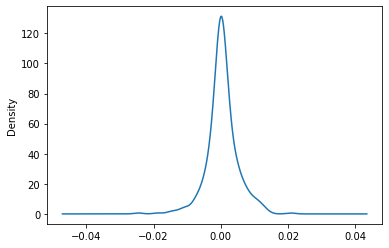

In [54]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [55]:
ramp['Percentage Change'].describe()

count    497.000000
mean       0.000492
std        0.004564
min       -0.024488
25%       -0.001366
50%        0.000309
75%        0.002277
max        0.020819
Name: Percentage Change, dtype: float64

In [56]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.546185
0    0.453815
Name: Price Direction, dtype: float64

# 2014

In [57]:
df_2014 = df[df['Date'].dt.year == 2014]
df_2014.head()

,Date,Time,Open,High,Low,Close
397203,2014-01-02,09:30:00,1845.86,1845.86,1842.69,1842.69
397204,2014-01-02,09:31:00,1842.46,1842.46,1842.06,1842.18
397205,2014-01-02,09:32:00,1842.07,1842.44,1842.07,1842.09
397206,2014-01-02,09:33:00,1842.43,1843.22,1842.43,1842.67
397207,2014-01-02,09:34:00,1842.62,1842.62,1841.74,1841.74


In [58]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2014[(df_2014['Time'] == '15:30:00') | (df_2014['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(498, 6)


,Date,Time,Open,High,Low,Close
495680,2014-12-29,16:00:00,2090.89,2090.89,2090.71,2090.71
496046,2014-12-30,15:30:00,2082.23,2082.27,2082.08,2082.08
496076,2014-12-30,16:00:00,2080.32,2080.35,2080.32,2080.34
496444,2014-12-31,15:30:00,2069.94,2070.17,2069.94,2070.17
496474,2014-12-31,16:00:00,2058.90,2058.91,2058.89,2058.90


In [59]:
ramp['Time'].value_counts()

16:00:00    249
15:30:00    249
Name: Time, dtype: int64

In [60]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
397563,2014-01-02,15:30:00,1832.72,1832.73,1832.28,1832.28,NaN,NaN
397593,2014-01-02,16:00:00,1832.04,1832.05,1832.01,1832.01,1832.72,-0.000371
397958,2014-01-03,15:30:00,1835.99,1836.14,1835.92,1835.96,1832.04,0.002156
397988,2014-01-03,16:00:00,1831.26,1831.31,1831.26,1831.31,1835.99,-0.002576
398353,2014-01-06,15:30:00,1830.48,1830.48,1830.30,1830.30,1831.26,-0.000426
...,...,...,...,...,...,...,...,...
495680,2014-12-29,16:00:00,2090.89,2090.89,2090.71,2090.71,2092.34,-0.000693
496046,2014-12-30,15:30:00,2082.23,2082.27,2082.08,2082.08,2090.89,-0.004142
496076,2014-12-30,16:00:00,2080.32,2080.35,2080.32,2080.34,2082.23,-0.000917
496444,2014-12-31,15:30:00,2069.94,2070.17,2069.94,2070.17,2080.32,-0.004990


In [61]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


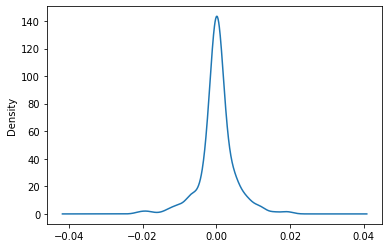

In [62]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [63]:
ramp['Percentage Change'].describe()

count    497.000000
mean       0.000246
std        0.004826
min       -0.021118
25%       -0.001288
50%        0.000175
75%        0.001742
max        0.020153
Name: Percentage Change, dtype: float64

In [64]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.540161
0    0.459839
Name: Price Direction, dtype: float64

# 2015

In [65]:
df_2015 = df[df['Date'].dt.year == 2015]
df_2015.head()

,Date,Time,Open,High,Low,Close
496480,2015-01-02,09:30:00,2058.90,2066.44,2058.90,2066.37
496481,2015-01-02,09:31:00,2066.41,2067.57,2065.92,2067.57
496482,2015-01-02,09:32:00,2067.56,2070.06,2067.56,2070.06
496483,2015-01-02,09:33:00,2070.06,2070.75,2069.90,2070.75
496484,2015-01-02,09:34:00,2070.69,2070.69,2069.82,2069.82


In [66]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2015[(df_2015['Time'] == '15:30:00') | (df_2015['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(500, 6)


,Date,Time,Open,High,Low,Close
595291,2015-12-29,16:00:00,2078.15,2078.23,2078.15,2078.23
595657,2015-12-30,15:30:00,2069.92,2069.92,2068.67,2068.92
595687,2015-12-30,16:00:00,2063.23,2063.32,2063.23,2063.30
596053,2015-12-31,15:30:00,2049.06,2049.96,2049.06,2049.96
596083,2015-12-31,16:00:00,2043.65,2043.76,2043.62,2043.76


In [67]:
ramp['Time'].value_counts()

16:00:00    250
15:30:00    250
Name: Time, dtype: int64

In [68]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
496840,2015-01-02,15:30:00,2054.90,2055.06,2054.79,2054.92,NaN,NaN
496870,2015-01-02,16:00:00,2058.03,2058.16,2058.03,2058.15,2054.90,0.001523
497236,2015-01-05,15:30:00,2020.92,2021.91,2020.91,2021.91,2058.03,-0.018032
497266,2015-01-05,16:00:00,2021.13,2021.13,2020.90,2020.90,2020.92,0.000104
497633,2015-01-06,15:30:00,2015.99,2016.03,2014.12,2014.83,2021.13,-0.002543
...,...,...,...,...,...,...,...,...
595291,2015-12-29,16:00:00,2078.15,2078.23,2078.15,2078.23,2080.29,-0.001029
595657,2015-12-30,15:30:00,2069.92,2069.92,2068.67,2068.92,2078.15,-0.003960
595687,2015-12-30,16:00:00,2063.23,2063.32,2063.23,2063.30,2069.92,-0.003232
596053,2015-12-31,15:30:00,2049.06,2049.96,2049.06,2049.96,2063.23,-0.006868


In [69]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


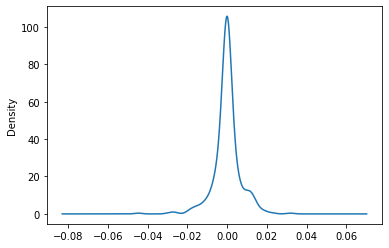

In [70]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [71]:
ramp['Percentage Change'].describe()

count    499.000000
mean       0.000011
std        0.006692
min       -0.044702
25%       -0.001895
50%        0.000000
75%        0.001974
max        0.031913
Name: Percentage Change, dtype: float64

In [72]:
ramp['Price Direction'].value_counts(normalize=True)

0    0.502
1    0.498
Name: Price Direction, dtype: float64

# 2016

In [73]:
df_2016 = df[df['Date'].dt.year == 2016]
df_2016.head()

,Date,Time,Open,High,Low,Close
596090,2016-01-04,09:30:00,2038.20,2038.20,2017.92,2017.92
596091,2016-01-04,09:31:00,2017.85,2018.05,2012.49,2012.99
596092,2016-01-04,09:32:00,2012.45,2012.46,2010.94,2010.94
596093,2016-01-04,09:33:00,2010.96,2011.00,2007.28,2007.38
596094,2016-01-04,09:34:00,2007.41,2007.41,2004.96,2005.14


In [74]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2016[(df_2016['Time'] == '15:30:00') | (df_2016['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(502, 6)


,Date,Time,Open,High,Low,Close
694954,2016-12-28,16:00:00,2249.92,2249.99,2249.92,2249.95
695320,2016-12-29,15:30:00,2248.99,2249.39,2248.83,2249.38
695350,2016-12-29,16:00:00,2249.28,2249.43,2249.28,2249.37
695716,2016-12-30,15:30:00,2239.53,2240.01,2239.39,2239.75
695746,2016-12-30,16:00:00,2239.79,2239.79,2239.20,2239.20


In [75]:
ramp['Time'].value_counts()

16:00:00    251
15:30:00    251
Name: Time, dtype: int64

In [76]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
596450,2016-01-04,15:30:00,1995.59,1996.66,1995.55,1996.66,NaN,NaN
596480,2016-01-04,16:00:00,2012.98,2013.08,2012.98,2012.98,1995.59,0.008714
596847,2016-01-05,15:30:00,2015.58,2016.55,2015.36,2015.36,2012.98,0.001292
596877,2016-01-05,16:00:00,2016.93,2016.94,2016.84,2016.84,2015.58,0.000670
597244,2016-01-06,15:30:00,1987.59,1989.52,1987.59,1989.37,2016.93,-0.014547
...,...,...,...,...,...,...,...,...
694954,2016-12-28,16:00:00,2249.92,2249.99,2249.92,2249.95,2251.53,-0.000715
695320,2016-12-29,15:30:00,2248.99,2249.39,2248.83,2249.38,2249.92,-0.000413
695350,2016-12-29,16:00:00,2249.28,2249.43,2249.28,2249.37,2248.99,0.000129
695716,2016-12-30,15:30:00,2239.53,2240.01,2239.39,2239.75,2249.28,-0.004335


In [77]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


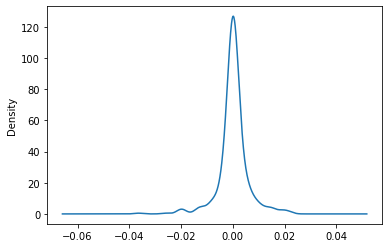

In [78]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [79]:
ramp['Percentage Change'].describe()

count    501.000000
mean       0.000247
std        0.005775
min       -0.036466
25%       -0.001422
50%        0.000180
75%        0.001686
max        0.022357
Name: Percentage Change, dtype: float64

In [80]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.541833
0    0.458167
Name: Price Direction, dtype: float64

# 2017

In [81]:
df_2017 = df[df['Date'].dt.year == 2017]
df_2017.head()

,Date,Time,Open,High,Low,Close
695752,2017-01-03,09:30:00,2251.57,2256.24,2251.57,2255.92
695753,2017-01-03,09:31:00,2255.85,2255.94,2254.07,2254.13
695754,2017-01-03,09:32:00,2254.15,2254.79,2254.15,2254.51
695755,2017-01-03,09:33:00,2254.52,2255.63,2254.34,2255.46
695756,2017-01-03,09:34:00,2255.50,2257.03,2255.50,2256.96


In [82]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2017[(df_2017['Time'] == '15:30:00') | (df_2017['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(498, 6)


,Date,Time,Open,High,Low,Close
794050,2017-12-27,16:00:00,2682.22,2682.51,2682.22,2682.51
794416,2017-12-28,15:30:00,2684.43,2684.49,2684.32,2684.34
794446,2017-12-28,16:00:00,2687.17,2687.45,2687.17,2687.45
794812,2017-12-29,15:30:00,2685.03,2685.04,2684.81,2684.82
794842,2017-12-29,16:00:00,2675.22,2675.92,2675.22,2675.30


In [83]:
ramp['Time'].value_counts()

16:00:00    249
15:30:00    249
Name: Time, dtype: int64

In [84]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
696112,2017-01-03,15:30:00,2249.81,2249.81,2249.08,2249.22,NaN,NaN
696142,2017-01-03,16:00:00,2257.44,2257.68,2257.44,2257.68,2249.81,0.003391
696508,2017-01-04,15:30:00,2271.22,2271.22,2270.81,2270.96,2257.44,0.006104
696538,2017-01-04,16:00:00,2270.53,2270.70,2270.53,2270.70,2271.22,-0.000304
696904,2017-01-05,15:30:00,2268.43,2268.51,2268.20,2268.42,2270.53,-0.000925
...,...,...,...,...,...,...,...,...
794050,2017-12-27,16:00:00,2682.22,2682.51,2682.22,2682.51,2679.59,0.000981
794416,2017-12-28,15:30:00,2684.43,2684.49,2684.32,2684.34,2682.22,0.000824
794446,2017-12-28,16:00:00,2687.17,2687.45,2687.17,2687.45,2684.43,0.001021
794812,2017-12-29,15:30:00,2685.03,2685.04,2684.81,2684.82,2687.17,-0.000796


In [85]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


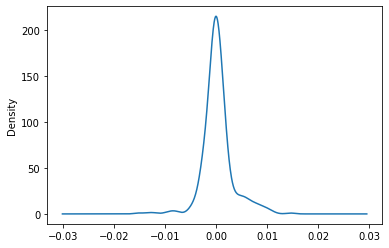

In [86]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [87]:
ramp['Percentage Change'].describe()

count    497.000000
mean       0.000353
std        0.002990
min       -0.015188
25%       -0.000969
50%        0.000082
75%        0.001235
max        0.014617
Name: Percentage Change, dtype: float64

In [88]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.52008
0    0.47992
Name: Price Direction, dtype: float64

# 2018

In [89]:
df_2018 = df[df['Date'].dt.year == 2018]
df_2018.head()

,Date,Time,Open,High,Low,Close
794849,2018-01-02,09:30:00,2683.73,2686.18,2683.73,2685.58
794850,2018-01-02,09:31:00,2685.60,2685.60,2684.30,2684.30
794851,2018-01-02,09:32:00,2684.32,2685.74,2684.23,2685.30
794852,2018-01-02,09:33:00,2685.18,2685.18,2683.73,2683.73
794853,2018-01-02,09:34:00,2683.80,2684.18,2683.05,2683.07


In [90]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2018[(df_2018['Time'] == '15:30:00') | (df_2018['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(496, 6)


,Date,Time,Open,High,Low,Close
893004,2018-12-27,16:00:00,2489.10,2489.10,2488.08,2488.14
893371,2018-12-28,15:30:00,2487.17,2487.80,2482.62,2485.85
893401,2018-12-28,16:00:00,2485.74,2485.74,2485.58,2485.63
893769,2018-12-31,15:30:00,2495.95,2497.83,2495.95,2497.33
893799,2018-12-31,16:00:00,2507.79,2507.79,2507.01,2507.01


In [91]:
ramp['Time'].value_counts()

16:00:00    248
15:30:00    248
Name: Time, dtype: int64

In [92]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
795209,2018-01-02,15:30:00,2692.96,2693.02,2692.53,2692.57,NaN,NaN
795239,2018-01-02,16:00:00,2695.87,2695.88,2695.81,2695.83,2692.96,0.001081
795606,2018-01-03,15:30:00,2711.41,2711.49,2711.30,2711.30,2695.87,0.005764
795636,2018-01-03,16:00:00,2712.71,2712.99,2712.71,2712.99,2711.41,0.000479
796003,2018-01-04,15:30:00,2726.50,2726.50,2726.20,2726.20,2712.71,0.005083
...,...,...,...,...,...,...,...,...
893004,2018-12-27,16:00:00,2489.10,2489.10,2488.08,2488.14,2455.69,0.013605
893371,2018-12-28,15:30:00,2487.17,2487.80,2482.62,2485.85,2489.10,-0.000775
893401,2018-12-28,16:00:00,2485.74,2485.74,2485.58,2485.63,2487.17,-0.000575
893769,2018-12-31,15:30:00,2495.95,2497.83,2495.95,2497.33,2485.74,0.004107


In [93]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


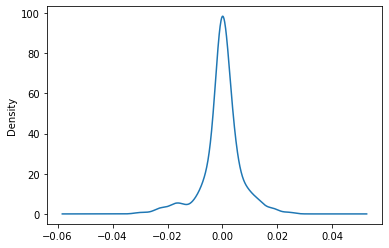

In [94]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [95]:
ramp['Percentage Change'].describe()

count    495.000000
mean      -0.000120
std        0.006945
min       -0.030603
25%       -0.001794
50%        0.000089
75%        0.002494
max        0.024803
Name: Percentage Change, dtype: float64

In [96]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.514113
0    0.485887
Name: Price Direction, dtype: float64

# 2019

In [97]:
df_2019 = df[df['Date'].dt.year == 2019]
df_2019.head()

,Date,Time,Open,High,Low,Close
893805,2019-01-02,09:30:00,2476.96,2476.96,2470.40,2470.98
893806,2019-01-02,09:31:00,2470.80,2474.09,2470.80,2473.70
893807,2019-01-02,09:32:00,2473.56,2473.56,2471.26,2471.44
893808,2019-01-02,09:33:00,2471.30,2472.88,2469.64,2471.67
893809,2019-01-02,09:34:00,2471.88,2472.49,2470.11,2471.04


In [98]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2019[(df_2019['Time'] == '15:30:00') | (df_2019['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(496, 6)


,Date,Time,Open,High,Low,Close
991970,2019-12-26,16:00:00,3240.07,3240.08,3240.00,3240.00
992336,2019-12-27,15:30:00,3241.17,3241.18,3240.95,3241.08
992366,2019-12-27,16:00:00,3239.95,3239.97,3239.95,3239.97
992732,2019-12-30,15:30:00,3224.13,3224.55,3224.10,3224.11
992762,2019-12-30,16:00:00,3221.81,3221.81,3221.40,3221.40


In [99]:
ramp['Time'].value_counts()

16:00:00    248
15:30:00    248
Name: Time, dtype: int64

In [100]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
894165,2019-01-02,15:30:00,2501.12,2501.12,2497.12,2497.90,NaN,NaN
894195,2019-01-02,16:00:00,2509.98,2509.98,2509.90,2509.97,2501.12,0.003542
894561,2019-01-03,15:30:00,2453.00,2453.07,2451.59,2452.07,2509.98,-0.022701
894591,2019-01-03,16:00:00,2447.77,2447.97,2447.77,2447.92,2453.00,-0.002132
894957,2019-01-04,15:30:00,2524.56,2525.11,2523.30,2525.02,2447.77,0.031371
...,...,...,...,...,...,...,...,...
991970,2019-12-26,16:00:00,3240.07,3240.08,3240.00,3240.00,3232.94,0.002205
992336,2019-12-27,15:30:00,3241.17,3241.18,3240.95,3241.08,3240.07,0.000339
992366,2019-12-27,16:00:00,3239.95,3239.97,3239.95,3239.97,3241.17,-0.000376
992732,2019-12-30,15:30:00,3224.13,3224.55,3224.10,3224.11,3239.95,-0.004883


In [101]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


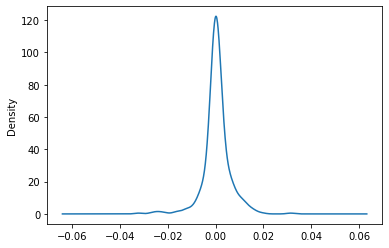

In [102]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [103]:
ramp['Percentage Change'].describe()

count    495.000000
mean       0.000527
std        0.005616
min       -0.032193
25%       -0.001318
50%        0.000361
75%        0.002411
max        0.031371
Name: Percentage Change, dtype: float64

In [104]:
ramp['Price Direction'].value_counts(normalize=True)

1    0.564516
0    0.435484
Name: Price Direction, dtype: float64

# 2020

In [105]:
df_2020 = df[df['Date'].dt.year == 2020]
df_2020.head()

,Date,Time,Open,High,Low,Close
0,2020-01-02,09:30:00,3244.67,3247.40,3244.67,3247.22
1,2020-01-02,09:31:00,3247.19,3247.22,3245.01,3245.22
2,2020-01-02,09:32:00,3245.07,3245.54,3244.16,3244.66
3,2020-01-02,09:33:00,3244.89,3247.69,3244.89,3247.61
4,2020-01-02,09:34:00,3247.38,3248.08,3246.92,3246.92


In [106]:
# for each day we need to take the 3:30 pm price / the 4:00 pm price
ramp = df_2020[(df_2020['Time'] == '15:30:00') | (df_2020['Time'] == '16:00:00')]
print(ramp.shape)
ramp.tail()

(456, 6)


,Date,Time,Open,High,Low,Close
89536,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90
90328,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90


In [107]:
ramp['Time'].value_counts()

16:00:00    228
15:30:00    228
Name: Time, dtype: int64

In [108]:
# calculate percentage change 
ramp['3:30 Price'] = ramp['Open'].shift(1)
ramp['Percentage Change'] = (ramp['Open'] / ramp['3:30 Price']) - 1
ramp

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Open,High,Low,Close,3:30 Price,Percentage Change
360,2020-01-02,15:30:00,3248.73,3249.12,3248.30,3248.71,NaN,NaN
390,2020-01-02,16:00:00,3258.14,3258.14,3257.98,3257.98,3248.73,0.002897
756,2020-01-03,15:30:00,3238.30,3238.39,3237.13,3237.13,3258.14,-0.006089
786,2020-01-03,16:00:00,3234.35,3234.57,3234.35,3234.57,3238.30,-0.001220
1152,2020-01-06,15:30:00,3240.54,3240.71,3239.64,3239.64,3234.35,0.001914
...,...,...,...,...,...,...,...,...
89536,2020-09-10,16:00:00,3338.75,3338.95,3338.75,3338.95,3338.75,0.000000
90267,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3338.75,0.002510
90268,2020-09-11,15:30:00,3347.13,3350.44,3347.13,3349.59,3347.13,0.000000
90327,2020-09-11,16:00:00,3340.88,3340.90,3340.82,3340.90,3347.13,-0.001867


In [109]:
# add price direction feature
ramp['Price Direction'] = ramp['Percentage Change'].apply(lambda x: 1 if x > 0 else 0)

/Users/josephbell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


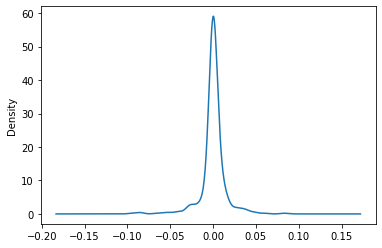

In [110]:
ax = ramp['Percentage Change'].plot.kde()
ax

In [111]:
ramp['Percentage Change'].describe()

count    455.000000
mean       0.000172
std        0.014803
min       -0.094492
25%       -0.001696
50%        0.000000
75%        0.003111
max        0.083137
Name: Percentage Change, dtype: float64

In [112]:
ramp['Price Direction'].value_counts(normalize=True)

0    0.583333
1    0.416667
Name: Price Direction, dtype: float64

In [ ]:
# TODO - Look at 3:30 - 3:40 and 3:30 - 3:50 for each year
# compare to other half hour periods of the day
# compare a $1 invested at 3:30 - 4:00 everyday vs $1 invested in the market